In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

In [76]:
#Item Sales vs Date Added Comparisons - Amusa

In [77]:
#Import CSV
csv = "Sales_Item_Merged.csv"
sales_data = pd.read_csv(csv)
sales_data

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date
0,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG,6/12/2015
1,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG,6/12/2015
2,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
3,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
4,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG,6/12/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23367,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG,9/24/2019
23368,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG,10/11/2019
23369,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG,10/11/2019
23370,I,Industrial,12663,"LIBERTY STEEL INDUSTRIES, INC.",OH,10/24/2019,ZS404,BRUSH-GRIT SIDE SCRUB BRUSH.,1,469.00,ZS,PDQ PARTS,A,FNSG,10/14/2019


In [ ]:
#nuance_df = pd.read_csv("Sales_Item_Merged.csv")
#nuance_df['year'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).year.astype(object)
#nuance_df['month'] = pd.DatetimeIndex(nuance_df['Date_Invoice']).month.astype(object)

In [121]:
sales_data_df = pd.read_csv("Sales_Item_Merged.csv")
sales_data['year'] = pd.DatetimeIndex(sales_data['price_net']).year.astype(object)
sales_data['month'] = pd.DatetimeIndex(sales_data['price_net']).month.astype(object)

In [122]:
#twenty_19_sales = nuance_df.loc[nuance_df['year']== 2019]
#twenty_20_sales = nuance_df.loc[nuance_df['year']== 2020]

In [123]:
twenty_19_sales = sales_data.loc[sales_data['year']== 2019]
twenty_20_sales = sales_data.loc[sales_data['year']== 2020]

In [125]:
price_net_2019 = twenty_19_sales.groupby(['price_net']).sum()
price_net_2020 = twenty_20_sales.groupby(['price_net']).sum()


In [129]:
top_ten_2019_qty = price_net_2019.sort_values(by = 'price_net', ascending = False)
top_ten_2020_qty = price_net_2020.sort_values(by = 'price_net', ascending = False)
twenty19_qty_labels = top_ten_2019_qty.head(10).index
top_ten_2019_qty.head()

,qty_ship
price_net,


In [130]:
top_ten_2020_qty = price_net_2020.sort_values(by = 'price_net', ascending = False)
top_ten_2020_qty = price_net_2020.sort_values(by = 'price_net', ascending = False)
twenty20_qty_labels = top_ten_2020_qty.head(10).index
top_ten_2020_qty.head()

,qty_ship
price_net,


In [120]:
# To sort from highest to lowest, ascending=False must be passed in
sales_data_Item_Add_date=sales_data.sort_values("Item_Add_date",ascending=False)
sales_data_Item_Add_date.head()

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm,Item_Add_date,year,month
11275,C,Contract,21590,TENNANT COMPANY,KY,4/16/2019,9210ABS050,COLD CLEAN PLUS,1,45.3,92,MISC SPEC,A,FNSG,9/9/2016,1970,1
11280,C,Contract,21590,TENNANT COMPANY,KY,8/19/2019,9210ABS050,COLD CLEAN PLUS,1,45.3,92,MISC SPEC,A,FNSG,9/9/2016,1970,1
11277,C,Contract,21590,TENNANT COMPANY,KY,6/3/2019,9210ABS050,COLD CLEAN PLUS,2,90.6,92,MISC SPEC,A,FNSG,9/9/2016,1970,1
11278,I,Industrial,13570,"MARK C POPE ASSOCIATES, INC.",GA,7/24/2019,9210ABS050,COLD CLEAN PLUS,1,26.1,92,MISC SPEC,A,FNSG,9/9/2016,1970,1
11276,C,Contract,21590,TENNANT COMPANY,KY,2/25/2019,9210ABS050,COLD CLEAN PLUS,1,45.3,92,MISC SPEC,A,FNSG,9/9/2016,1970,1


In [94]:
# Collecting a summary of data for analysis
sales_data_Item_Add_date.describe()

,qty_ship,price_net
count,23372.000000,23372.000000
mean,265.313837,2419.787054
std,957.139482,5722.500328
min,1.000000,1.400000
25%,4.000000,99.360000
50%,24.000000,340.200000
75%,123.000000,1900.000000
max,50040.000000,76108.800000


In [95]:
# Finding the item added dates
#sales_data_Item_Add_date["Item_Add_date"].unique()

In [96]:
# Finding the shipped
#sales_data["qty_ship"].unique()

In [131]:
# Finding the item price
#sales_data["price_net"].unique()

In [132]:
id_item_group_2020 = twenty_20_sales.groupby(["id_item", "Item_Add_date"]).sum().sort_values(by="price_net",ascending = False)

id_item_group_2020=id_item_group_2020.reset_index(level=1, drop=False)
id_item_group_2020.head(10)

,Item_Add_date,qty_ship,price_net
id_item,,,


In [133]:
# Dataframe of the average stats for each year sales
#twenty_19_sales = sales_data.loc[sales_data['year']== 2019]
#twenty_20_sales = sales_data.loc[sales_data['year']== 2020]
id_item_group_2019 = twenty_19_sales.groupby(["id_item", "Item_Add_date"]).sum().sort_values(by="price_net",ascending = False)

id_item_group_2019=id_item_group_2019.reset_index(level=1, drop=False)
id_item_group_2019.head(10)


,Item_Add_date,qty_ship,price_net
id_item,,,


In [101]:
    #id_item_group_2019 = pd.DataFrame({
   # "Item_Add_date": ["12/30/1994", "9/24/2014", "6/18/2015", "7/16/2018", "12/30/1994", "7/25/2013","12/30/1994", "2/21/         2014", "12/15/1999", "6/7/2011"],
    #"qty_ship": [1135086, 205989, 570819, 16740, 39514,110, 29394, 1077, 24899, 425],
    #"price_net": [2154237.70,  1434360.43, 696399.18, 567486.00, 538575.82, 518650.00, 504694.98, 390951.00, 383652.7,            381862.50]
    #}
    #id_item_group_2019


In [ ]:
#index=[1, 2, 3, 4, 5])

In [17]:

#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, * align='center', data=None, **kwargs)[source]

The mean 2019_quantity shipped is: 2302.97
The standard deviation of 2019_quantity shipped is: 20493.85


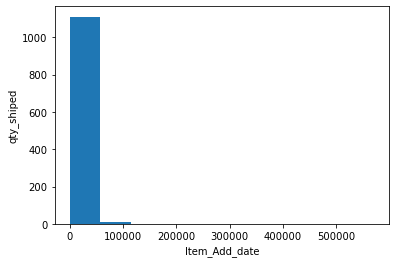

In [60]:
# Calculate the summary statistics and plot the histogram of the entire population data

print(f"The mean 2019_quantity shipped is: {round(id_item_group_2019.qty_ship.mean(),2)}")
print(f"The standard deviation of 2019_quantity shipped is: {round(id_item_group_2019.qty_ship.std(),2)}")
plt.hist(id_item_group_2019.qty_ship)
plt.xlabel("Item_Add_date")
plt.ylabel("qty_shiped") 
plt.show()

In [355]:
id_item_group_2020 = twenty_20_sales.groupby(["id_item", "Item_Add_date"]).sum().sort_values(by="price_net",ascending = False)

id_item_group_2020=id_item_group_2020.reset_index(level=1, drop=False)
id_item_group_2020.head(10)

,Item_Add_date,qty_ship,price_net
id_item,,,
1805EUP010,1/12/2020,90190,2931175.00
1600NUC040,12/30/1994,114768,1825958.88
6378SEV034,9/24/2014,148560,1175026.38
7073MMM030,7/29/2020,137873,1126422.41
1805EUP080,1/12/2020,149567,1112778.82
6378SEV037,5/21/2020,121394,965766.16
8289PLI600,6/18/2015,519108,633311.76
1680NUC030,7/16/2018,14587,494963.58
7076CUS031,3/16/2020,14115,491101.27


In [285]:
#Item_Add_date_group = Item_Add_date_group.groupby(["Item_Add_date"])


In [65]:
# Sorting Item add date from lowest to highest if no other parameter is passed
#Item_Add_date_group=Item_Add_date_group.sort_values("Item_Add_date")
#Item_Add_date_group.head()

In [66]:
# Sorting Item add date from lowest to highest if no other parameter is passed
#Item_Add_date_group=Item_Add_date_group.sort_values("Item_Add_date")
#Item_Add_date_group

In [327]:
#df.index = pd.to_datetime(df.index)
#df_Date = Item_Add_date_group
#Item_Add_date = pd.to_datetime('Item_Add_date'.index)
#df_Date()

In [328]:
df_index_reset = Item_Add_date_group.reset_index(drop=False)
df_index_reset


,Item_Add_date,qty_ship,price_net
0,1/10/1995,6.276596,2243.495319
1,1/11/2006,55.250000,2603.750000
2,1/11/2012,4.181818,1530.814545
3,1/11/2013,38.285714,1099.292857
4,1/12/2020,1849.298701,28922.021883
...,...,...,...
696,9/6/2019,4.500000,3662.750000
697,9/7/2017,20.093023,767.162791
698,9/8/2020,1.925926,187.368889
699,9/9/1999,316.833333,4751.738333


In [68]:

df_index_reset['year'] = pd.DatetimeIndex(df_index_reset['Item_Add_date']).year.astype(object)
df_index_reset['month'] = pd.DatetimeIndex(df_index_reset['Item_Add_date']).month.astype(object)

NameError: name 'df_index_reset' is not defined

In [334]:
top_ten_2019_qty = category_sales_2019.sort_values(by = 'qty_ship', ascending = False)
top_ten_2020_qty = category_sales_2020.sort_values(by = 'qty_ship', ascending = False)
twenty19_qty_labels = top_ten_2019_qty.head(10).index
twenty20_qty_labels = top_ten_2020_qty.head(10).index

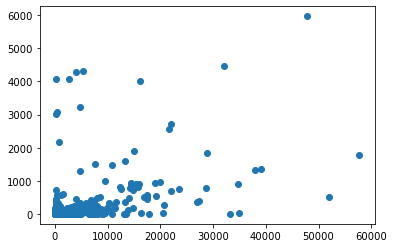

In [332]:

qty_ship = Item_Add_date_group.iloc[:,-1]
price_net = Item_Add_date_group.iloc[:,-2]
plt.scatter(qty_ship,price_net)
plt.show()

#Item_Add_date = Add_date_group.iloc[:,1]
#qty_ship = Add_date_group.iloc[:,2]
##price_net = Add_date_group.iloc[:,3]
#correlation = st.pearson(qty_ship,price_net)
#plt.scatter(qty_ship,price_net)
#plt.xlabel('Quantity shipped')
#plt.ylabel('Price')
#plt.show()



In [291]:
#2019 & #2020
#Item_Add_date_group.index = pd.to_datetime(Item_Add_date_group.index)

#2019
# Create a new dataframe with only 2019
#Item_Add_date_group = Item_Add_date_group.sort_values("Item_Add_date")
#df_2019 = Item_Add_date_group.loc['2019']
#df_2019


In [292]:
#2019
# Create a new dataframe with only 2019

#df_2019 = Item_Add_date_group.loc['2019']
#df_2019


In [293]:
#2020
#Create a new datafrma eiwht only 2020

#df_2020 = Item_Add_date.loc['2020']
#df_2020.reset_index(inplace=True)
#df_2020

In [ ]:
#Concat both the dataframes
#pd.concat([df_2019, df_2020.set_index(df_2019.index)], axis=0)

In [294]:
#pd.concat.head()

In [295]:
#Concat both the dataframes
#pd.concat([df_2019, df_2020.set_index(df_2019.index)], axis=0)

In [296]:
#df_combind = Item_Add_date_group.loc[['2019','2020']]
#df_combind.head()

In [297]:
df_2019.head()

,level_0,index,Item_Add_date,qty_ship,price_net
0,0,0,2019-01-15,2.818182,3618.996364
1,1,1,2019-01-18,9.333333,2754.906667
2,2,2,2019-01-22,200.545455,5483.429091
3,3,3,2019-01-23,4.000000,1323.000000
4,4,4,2019-01-24,86.000000,2231.700000


In [298]:
df_2019

,level_0,index,Item_Add_date,qty_ship,price_net
0,0,0,2019-01-15,2.818182,3618.996364
1,1,1,2019-01-18,9.333333,2754.906667
2,2,2,2019-01-22,200.545455,5483.429091
3,3,3,2019-01-23,4.000000,1323.000000
4,4,4,2019-01-24,86.000000,2231.700000
...,...,...,...,...,...
77,77,77,2019-09-25,4.000000,7.800000
78,78,78,2019-09-26,4077.500000,163.100000
79,79,79,2019-09-03,3.833333,280.124667
80,80,80,2019-09-04,194.000000,580.060000


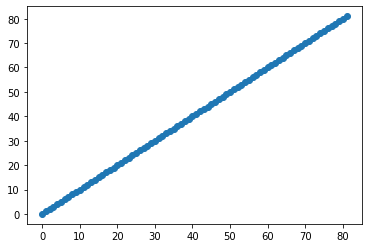

In [299]:
qty_ship = df_2019.iloc[:,-4]
price_net = df_2019.iloc[:,-5]
plt.scatter(qty_ship,price_net)
plt.show()

In [300]:
df_2020.head()

,Item_Add_date,qty_ship,price_net
0,2020-01-12,1849.298701,28922.021883
1,2020-01-19,1328.000000,37861.280000
2,2020-01-02,22.571429,3468.540000
3,2020-01-20,49.921053,1020.381579
4,2020-01-21,16.888889,1265.194444


In [318]:
df_2020

,Item_Add_date,qty_ship,price_net
0,2020-01-12,1849.298701,28922.021883
1,2020-01-19,1328.000000,37861.280000
2,2020-01-02,22.571429,3468.540000
3,2020-01-20,49.921053,1020.381579
4,2020-01-21,16.888889,1265.194444
...,...,...,...
79,2020-09-15,1.000000,48.160000
80,2020-09-02,140.000000,5460.000000
81,2020-09-24,6.000000,899.700000
82,2020-09-28,26.000000,1297.920000


In [319]:
qty_ship = df_2020.iloc[:,2]
price_net = df_2019.iloc[:,3]
plt.scatter(qty_ship,price_net)
plt.show()

ValueError: x and y must be the same size

In [308]:
# Check to see if there are any rows with missing data
Item_Add_date_group.count()

qty_ship     701
price_net    701
dtype: int64

In [199]:
df_2019.count()

index            82
Item_Add_date    82
qty_ship         82
price_net        82
dtype: int64

In [309]:
df_2020.count()

Item_Add_date    84
qty_ship         84
price_net        84
dtype: int64

In [317]:
#df = df_2019
df.sort_values(by=[qty_ship, price_net])
df.sort_values.head()

KeyError: 0     1849.298701
1     1328.000000
2       22.571429
3       49.921053
4       16.888889
         ...     
79       1.000000
80     140.000000
81       6.000000
82      26.000000
83       1.925926
Name: qty_ship, Length: 84, dtype: float64

In [28]:
df_2020.merge(df_2019,left_index=True, right_index=True)

,Item_Add_date_x,qty_ship_x,price_net_x,Item_Add_date_y,qty_ship_y,price_net_y
0,2020-01-12,1849.298701,28922.021883,2019-01-15,2.818182,3618.996364
1,2020-01-19,1328.000000,37861.280000,2019-01-18,9.333333,2754.906667
2,2020-01-02,22.571429,3468.540000,2019-01-22,200.545455,5483.429091
3,2020-01-20,49.921053,1020.381579,2019-01-23,4.000000,1323.000000
4,2020-01-21,16.888889,1265.194444,2019-01-24,86.000000,2231.700000
...,...,...,...,...,...,...
77,2020-08-06,6.000000,250.980000,2019-09-25,4.000000,7.800000
78,2020-09-14,1.000000,260.340000,2019-09-26,4077.500000,163.100000
79,2020-09-15,1.000000,48.160000,2019-09-03,3.833333,280.124667
80,2020-09-02,140.000000,5460.000000,2019-09-04,194.000000,580.060000


In [203]:
# Considering date is in dd/mm/yyyy format
Add_Date_df = sales_data.set_index(['Item_Add_date'])
Add_Date_df

,Silo,Silo_Description,Cust_ID,name_cust,id_st,Date_Invoice,id_item,descr_1,qty_ship,price_net,code_cat_prdt,category,flag_stat_item,code_comm
Item_Add_date,,,,,,,,,,,,,,
6/12/2015,I,Industrial,22777,USHER OIL COMPANY,MI,3/18/2019,1000ABS550,ACTIV VIII,8,1750.56,10,AC8000 MOD,A,FNSG
6/12/2015,I,Industrial,22777,USHER OIL COMPANY,MI,5/21/2019,1000ABS550,ACTIV VIII,8,1838.08,10,AC8000 MOD,A,FNSG
6/12/2015,I,Industrial,22777,USHER OIL COMPANY,MI,2/11/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG
6/12/2015,I,Industrial,22777,USHER OIL COMPANY,MI,4/6/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG
6/12/2015,I,Industrial,22777,USHER OIL COMPANY,MI,8/19/2020,1000ABS550,ACTIV VIII,4,919.04,10,AC8000 MOD,A,FNSG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/24/2019,I,Industrial,1801,MSP INDUSTRIES,MI,9/27/2019,ZS401,BRUSH-SPIRAL WRAP SCRUB BRUSH,2,1139.50,ZS,PDQ PARTS,A,FNSG
10/11/2019,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS402,BRUSH-HI DENSITY SCRUB BRUSH,2,822.50,ZS,PDQ PARTS,A,FNSG
10/11/2019,J,JanSan,1000,SAMPLE ORDER,OH,10/21/2019,ZS403,BRUSH-SIDE SCRUB BRUSH,1,207.00,ZS,PDQ PARTS,A,FNSG


In [47]:
#Create df of 2019 and 2020 top items by Item_Add_date
#twenty_19_sales = Add_Date_df.loc[Add_Date_df[‘year’]== 2019]
#twenty_20_sales = Add_Date_df.loc[Add_Date_df[‘year’]== 2020]


In [245]:
#df_2019
#twenty_19_Top_sales = df_2019.loc[df_2019['Item_Add_date']== 2019]
#twenty_19_Top_sales()

In [ ]:
#df.index = Add_Date_df.date
#df.head()

In [202]:
# Considering date is in dd/mm/yyyy format
# Sorting Item add date from lowest to highest if no other parameter is passed
df=Item_Add_date_group
Add_date_group= df.sort_values("Item_Add_date")
Add_date_group.head()

,qty_ship,price_net
Item_Add_date,,
1/10/1995,6.276596,2243.495319
1/11/2006,55.250000,2603.750000
1/11/2012,4.181818,1530.814545
1/11/2013,38.285714,1099.292857
1/12/2020,1849.298701,28922.021883


In [41]:
#Plot=df('Item_Add_date').head(10).plot (kind= 'pie', startangle=90, labels=
#Plot.set_ylabel("")

In [42]:
#Select the Date_Invoice of dataframe
#s=organized_df["Date_Invoice"][0]
#s[5:len(s)]
#s[-4:]

In [44]:
#is_2019 = organized_df["Item_Add_date"]==2019
#is_2019

In [ ]:
is_2020 = organized_df["Item_Add_date"]==2020
is_2020

In [33]:
Add_date_group = pd.DataFrame({
    "Item_Add_date": ["1/10/1995", "1/11/2006", "1/11/2012", "1/11/2013", "1/12/2020"],
    "qty_ship": [6.276596, 55.250000, 4.181818, 38.285714, 1849.298701],
    "price_net": [2243.495319, 2603.750000, 1530.814545, 1099.292857, 28922.021883]
}, index=[1, 2, 3, 4, 5])
Add_date_group


,Item_Add_date,qty_ship,price_net
1,1/10/1995,6.276596,2243.495319
2,1/11/2006,55.250000,2603.750000
3,1/11/2012,4.181818,1530.814545
4,1/11/2013,38.285714,1099.292857
5,1/12/2020,1849.298701,28922.021883


In [35]:
#Add_date_group = pd.DataFrame([
       # ('1','Blue',1/10/1995),
       # ('1','Green',6.276596),
        #('1','Green',2243.495319),
        #], 
    #columns=['Item_Add_date', 'qty_ship', 'price_net'])
#Add_date_group = Add_date_group.set_index(['Item_Add_date', 'qty_ship', 'price_net']).value
#Add_date_group.unstack().plot(kind='bar', stacked=True)

In [ ]:
#Item_Add_date = Add_date_group.iloc[:,1]
#qty_ship = Add_date_group.iloc[:,2]
##price_net = Add_date_group.iloc[:,3]
#correlation = st.pearson(qty_ship,price_net)
#plt.scatter(qty_ship,price_net)
#plt.xlabel('Quantity shipped')
#plt.ylabel('Price')
#plt.show()

In [ ]:
#df['2019'].groupby('qty_ship').sum()